Connected to Python 3.12.7

In [ ]:
# %%

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from lime import lime_image
from skimage.segmentation import mark_boundaries

C:\Users\adhit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#%%

# 1. Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# %%

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = np.expand_dims(X_train, -1)  # Shape: (num_samples, 28, 28, 1)
X_test = np.expand_dims(X_test, -1)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
# %%

# 2. Build and train the LeNet model
model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\adhit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# %%

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#%%

model.fit(X_train, y_train_cat, epochs=5, batch_size=128, 
          validation_data=(X_test, y_test_cat))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7854 - loss: 0.6845 - val_accuracy: 0.9658 - val_loss: 0.1067
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9686 - loss: 0.0975 - val_accuracy: 0.9784 - val_loss: 0.0628
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9803 - loss: 0.0631 - val_accuracy: 0.9801 - val_loss: 0.0570
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9845 - loss: 0.0494 - val_accuracy: 0.9858 - val_loss: 0.0394
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9877 - loss: 0.0388 - val_accuracy: 0.9853 - val_loss: 0.0415


In [ ]:
# %%

# 3. Select an instance to explain
idx = 0  # Change this index to explain a different instance
test_image = X_test[idx]
test_label = y_test[idx]

pred_probs = model.predict(np.expand_dims(test_image, axis=0))
pred_class = np.argmax(pred_probs[0])

print(f"True Label: {test_label}")
print(f"Predicted Label: {pred_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
True Label: 7
Predicted Label: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
True Label: 7
Predicted Label: 7


In [ ]:
#%%

# 4. Initialize LIME ImageExplainer and define prediction function
explainer = lime_image.LimeImageExplainer()

def predict_fn(images):
    images = np.array(images).astype('float32') / 255.0
    images = np.expand_dims(images, -1) if images.ndim == 3 else images
    return model.predict(images)

# 5. Generate explanation
explanation = explainer.explain_instance(
    image=test_image.squeeze(),
    classifier_fn=predict_fn,
    top_labels=5,
    hide_color=0,
    num_samples=1000
)

temp, mask = explanation.get_image_and_mask(
    label=pred_class,
    positive_only=True,
    num_features=5,
    hide_rest=False
)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


  1%|          | 10/1000 [00:00<01:02, 15.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  2%|▏         | 20/1000 [00:01<00:50, 19.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  3%|▎         | 30/1000 [00:01<00:33, 29.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  4%|▍         | 40/1000 [00:01<00:24, 39.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  5%|▌         | 50/1000 [00:01<00:19, 48.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  6%|▌         | 60/1000 [00:01<00:16, 57.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  7%|▋         | 70/1000 [00:01<00:14, 64.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  8%|▊         | 80/1000 [00:01<00:12, 70.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  9%|▉         | 90/1000 [00:01<00:12, 71.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 10%|█         | 100/1000 [00:02<00:12, 72.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 11%|█         | 110/1000 [00:02<00:11, 77.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 12%|█▏        | 120/1000 [00:02<00:11, 78.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 13%|█▎        | 130/1000 [00:02<00:10, 79.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 14%|█▍        | 140/1000 [00:02<00:10, 81.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 15%|█▌        | 150/1000 [00:02<00:10, 83.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 16%|█▌        | 160/1000 [00:02<00:09, 84.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 17%|█▋        | 170/1000 [00:02<00:10, 82.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 18%|█▊        | 180/1000 [00:02<00:09, 83.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 19%|█▉        | 190/1000 [00:03<00:09, 85.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 20%|██        | 200/1000 [00:03<00:09, 86.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 21%|██        | 210/1000 [00:03<00:08, 88.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 22%|██▏       | 220/1000 [00:03<00:08, 87.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 23%|██▎       | 230/1000 [00:03<00:08, 87.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 24%|██▍       | 240/1000 [00:03<00:08, 89.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 25%|██▌       | 250/1000 [00:03<00:08, 89.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 26%|██▌       | 260/1000 [00:03<00:08, 89.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 27%|██▋       | 270/1000 [00:04<00:08, 89.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 28%|██▊       | 280/1000 [00:04<00:07, 90.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 29%|██▉       | 290/1000 [00:04<00:07, 91.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 30%|███       | 300/1000 [00:04<00:07, 90.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 31%|███       | 310/1000 [00:04<00:07, 89.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 32%|███▏      | 320/1000 [00:04<00:08, 79.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 33%|███▎      | 330/1000 [00:04<00:08, 82.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 34%|███▍      | 340/1000 [00:04<00:07, 84.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 35%|███▌      | 350/1000 [00:04<00:07, 85.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 36%|███▌      | 360/1000 [00:05<00:07, 86.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 37%|███▋      | 370/1000 [00:05<00:07, 88.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 38%|███▊      | 380/1000 [00:05<00:07, 87.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 39%|███▉      | 390/1000 [00:05<00:07, 86.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 40%|████      | 400/1000 [00:05<00:06, 86.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 41%|████      | 410/1000 [00:05<00:06, 85.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 42%|████▏     | 420/1000 [00:05<00:07, 79.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 43%|████▎     | 430/1000 [00:05<00:07, 80.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 44%|████▍     | 440/1000 [00:06<00:06, 83.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 45%|████▌     | 450/1000 [00:06<00:06, 85.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 46%|████▌     | 460/1000 [00:06<00:06, 86.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 47%|████▋     | 470/1000 [00:06<00:06, 87.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 48%|████▊     | 480/1000 [00:06<00:05, 89.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 49%|████▉     | 490/1000 [00:06<00:05, 89.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 50%|█████     | 500/1000 [00:06<00:05, 89.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 51%|█████     | 510/1000 [00:06<00:05, 88.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 52%|█████▏    | 520/1000 [00:06<00:05, 90.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 53%|█████▎    | 530/1000 [00:06<00:05, 90.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 54%|█████▍    | 540/1000 [00:07<00:05, 86.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 55%|█████▌    | 550/1000 [00:07<00:05, 77.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 56%|█████▌    | 560/1000 [00:07<00:05, 81.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 57%|█████▋    | 570/1000 [00:07<00:05, 83.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 58%|█████▊    | 580/1000 [00:07<00:04, 84.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 59%|█████▉    | 590/1000 [00:07<00:04, 85.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 60%|██████    | 600/1000 [00:07<00:04, 87.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 61%|██████    | 610/1000 [00:07<00:04, 86.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 62%|██████▏   | 620/1000 [00:08<00:04, 85.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 63%|██████▎   | 630/1000 [00:08<00:04, 86.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 64%|██████▍   | 640/1000 [00:08<00:04, 87.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 65%|██████▌   | 650/1000 [00:08<00:03, 87.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 66%|██████▌   | 660/1000 [00:08<00:03, 88.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 67%|██████▋   | 670/1000 [00:08<00:03, 89.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 68%|██████▊   | 680/1000 [00:08<00:03, 89.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 69%|██████▉   | 690/1000 [00:08<00:03, 90.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 70%|███████   | 700/1000 [00:08<00:03, 87.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 71%|███████   | 710/1000 [00:09<00:03, 89.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 72%|███████▏  | 720/1000 [00:09<00:03, 90.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 73%|███████▎  | 730/1000 [00:09<00:02, 92.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 74%|███████▍  | 740/1000 [00:09<00:02, 92.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 75%|███████▌  | 750/1000 [00:09<00:02, 93.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 76%|███████▌  | 760/1000 [00:09<00:02, 94.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 77%|███████▋  | 770/1000 [00:09<00:02, 90.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 78%|███████▊  | 780/1000 [00:09<00:02, 90.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 79%|███████▉  | 790/1000 [00:09<00:02, 87.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 80%|████████  | 800/1000 [00:10<00:02, 89.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 81%|████████  | 810/1000 [00:10<00:02, 90.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 82%|████████▏ | 820/1000 [00:10<00:01, 91.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 83%|████████▎ | 830/1000 [00:10<00:01, 90.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 84%|████████▍ | 840/1000 [00:10<00:01, 89.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 85%|████████▌ | 850/1000 [00:10<00:01, 84.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 86%|████████▌ | 860/1000 [00:10<00:01, 86.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 87%|████████▋ | 870/1000 [00:10<00:01, 88.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 88%|████████▊ | 880/1000 [00:10<00:01, 88.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 89%|████████▉ | 890/1000 [00:11<00:01, 81.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 90%|█████████ | 900/1000 [00:11<00:01, 85.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 91%|█████████ | 910/1000 [00:11<00:01, 86.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 92%|█████████▏| 920/1000 [00:11<00:00, 86.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 93%|█████████▎| 930/1000 [00:11<00:00, 85.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 94%|█████████▍| 940/1000 [00:11<00:00, 85.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 95%|█████████▌| 950/1000 [00:11<00:00, 84.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 96%|█████████▌| 960/1000 [00:11<00:00, 87.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 97%|█████████▋| 970/1000 [00:12<00:00, 88.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 98%|█████████▊| 980/1000 [00:12<00:00, 88.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 99%|█████████▉| 990/1000 [00:12<00:00, 89.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


100%|██████████| 1000/1000 [00:12<00:00, 80.86it/s]


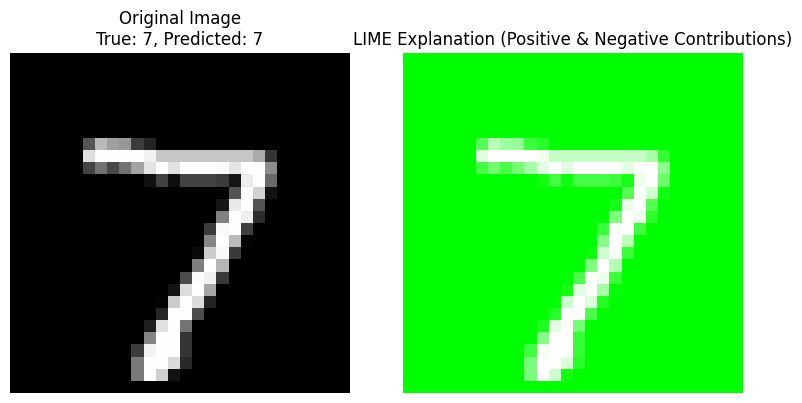

In [ ]:
# %%

# Display the explanations with both positive and negative contributions
plt.figure(figsize=(8, 4))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f"Original Image\nTrue: {test_label}, Predicted: {pred_class}")
plt.axis('off')

# Plot the explanation with boundaries
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation (Positive & Negative Contributions)")
plt.axis('off')

plt.tight_layout()
plt.show()